In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from scipy.stats import entropy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Input, Dropout, LSTM
from tensorflow.keras.layers import Bidirectional,BatchNormalization
from tensorflow.keras.layers import PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import callbacks,layers
import random
from sklearn.utils import resample
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

In [2]:
data = pd.read_csv("Dataset_Combined.csv", low_memory=False)

In [3]:
to_drop = ['ACC_x', 'ACC_y', 'ACC_z']

In [4]:
data.drop(to_drop, axis=1, inplace=True)

In [5]:
y = data.pop('status')
X = data

In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [7]:
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
X_train = np.array(X_train).reshape(-1,12,1)
x_test = np.array(x_test).reshape(-1,12,1)

In [8]:
model2 = keras.Sequential()
model2.add(layers.Dense(32, input_shape=(12,), activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')

In [9]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model2.fit(X_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=64, callbacks=[es])

Epoch 1/15
3600/3600 [==============================] - 4s 828us/step - loss: 0.5646 - accuracy: 0.6932 - val_loss: 0.5138 - val_accuracy: 0.7309
Epoch 2/15
3600/3600 [==============================] - 3s 788us/step - loss: 0.4933 - accuracy: 0.7482 - val_loss: 0.4743 - val_accuracy: 0.7630
Epoch 3/15
3600/3600 [==============================] - 3s 790us/step - loss: 0.4633 - accuracy: 0.7654 - val_loss: 0.4561 - val_accuracy: 0.7626
Epoch 4/15
3600/3600 [==============================] - 3s 791us/step - loss: 0.4417 - accuracy: 0.7797 - val_loss: 0.4307 - val_accuracy: 0.7903
Epoch 5/15
3600/3600 [==============================] - 3s 789us/step - loss: 0.4230 - accuracy: 0.7919 - val_loss: 0.4161 - val_accuracy: 0.7991
Epoch 6/15
3600/3600 [==============================] - 3s 792us/step - loss: 0.4087 - accuracy: 0.8009 - val_loss: 0.4131 - val_accuracy: 0.7982
Epoch 7/15
3600/3600 [==============================] - 3s 827us/step - loss: 0.3969 - accuracy: 0.8086 - val_loss: 0.3911 -

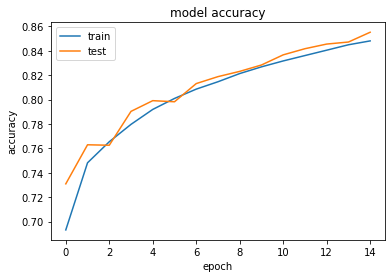

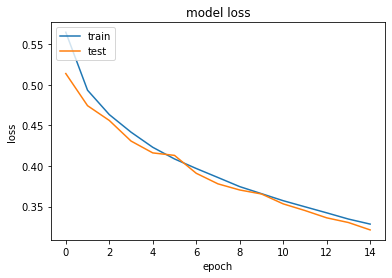

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("acc_dnn_total.png")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss_dnn_total.png")
plt.show()